In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch07. 객체지향 프로그래밍 </font></b>

- 프로그래밍 언어는 객체지향 언어와 함수지향 언어가 있다
- 아래는 개념 익히기

In [7]:
person1 = {'name':'kil dong', 'gender':'male','accademy':'MBC'}
person2 = {'name':'kil suk', 'sender':'female', 'accademy':'MBC'}
print(person1['name'], person1['gender'], person1['accademy'])
person2['name'] = 'kkil suk'
print(person2['name'], person2.get('gender'), person2['accademy'])

kil dong male MBC
kkil suk None MBC


In [24]:
# person 타입의 클래스를 만들겠다.
# 클래스 이름은 대문자로 시작. 카멜형으로 작성
# 클래스 안의 함수는 인스턴스 함수라고 부르며, 매개변수는 일반적으로 self를 쓴다. self = '내 객체의'
class Person:                   
    # (Object)는 주로 생략된다. __str__() 함수 는 Object 안에 있는데, 클래스를 만들때 Person 클래스로 상속시킨다
    accademy = 'MBC'                    # 클래스 변수 : 클래스 안에서 기본값을 갖는 변수. 여기서는 accademy 
    def __init__(self, name, gender):   # __init__ : 생성자함수, 객체가 생성될 때 자동으로 실행되는 함수
        self.name = name                # 객체 안의 변수(인스턴스 변수)
        self.gender = gender
        
    def print_info(self):
        print('{}는 {}입니다. {}를 다닙니다'.format(self.name, 
                                               self.gender, 
                                               self.accademy))
    def __str__(self):
        return '{}는 {}입니다. {}를 다닙니다'.format(self.name, 
                                               self.gender, 
                                               self.accademy)

In [26]:
p1 = Person('홍길동', '남자')
p2 = Person('홍길술', '여자')
p1.print_info()
p2.print_info()
p1.name = '김탁구'
p1.accademy = '제빵소'
p1.print_info()
p2.print_info()


홍길동는 남자입니다. MBC를 다닙니다
홍길술는 여자입니다. MBC를 다닙니다
김탁구는 남자입니다. 제빵소를 다닙니다
홍길술는 여자입니다. MBC를 다닙니다


In [27]:
print(p1)
print(p1.__str__())   # 클래스를 만들때

김탁구는 남자입니다. 제빵소를 다닙니다
김탁구는 남자입니다. 제빵소를 다닙니다


# 1절. 객체와 클래스
```
class 클래스명(상속받을 클래스명):
    변수나 함수들 선언
```

In [29]:
class Person:
    '''
    Person 클래스는 블라블라 설명하는 독스트링 삽입 가능
    생성자 함수가 없을 경우, 디폴트 생성자 함수가 자동 생성
    '''
    def __init__(self): # 생성자 함수를 쓰지 않을 수 있다. 
        pass          # 이 경우 '아무것도 하지 않는 생성자 함수'(디폴트 생성자 함수)가 자동 생성

p1=Person()
print(p1)
print(type(p1))

<class '__main__.Person'>


In [30]:
isinstance(p1, Person)

True

In [31]:
p1.__doc__

'\n    Person 클래스는 블라블라 설명하는 독스트링 삽입 가능\n    생성자 함수가 없을 경우, \n    '

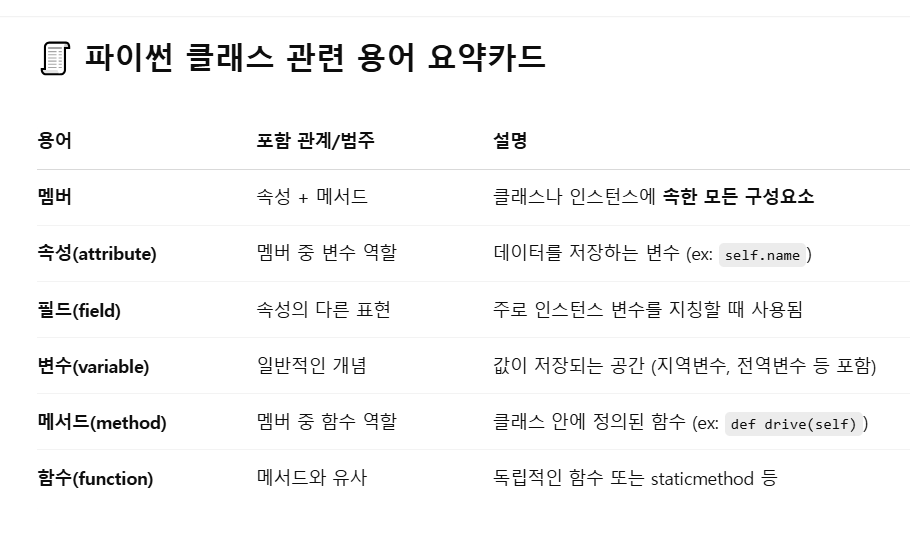

# 2절. 생성자와 소멸자
```
- 생성자는 __init__(self, 매개변수,...) - 객체가 생성될때 자동 실행. 
    객체 생성시 필요한 객체 안에 있는 변수(인스턴스 변수)를 초기화 및 설정을 포함
- 소멸자는 __del__(self) - 객체가 소멸될 때 자동 실행
    인스턴스 객체의 레퍼런스 카운트가 0이 될 때 실행
```

In [32]:
class Person:
    accademy = "MBC"
    def __init__(self, name, gender='남자'):
        self.name = name        # 인스턴스 변수
        self.gender = gender
        print('Person 객체를 생성합니다', name)

# 함수 오버로딩(중복)될 지원안됨, 마지막 생성자만 유효함        
#     def __init__(self, name):
#         self.name = name        
#         self.gender = '남자'
        
    def __del__(self):
        print('Person 객체를 소멸시킵니다', self.name)
        
    def print_info(self):
        print('{}는 {}입니다'.format(self.name,
                                    self.gender))
    def __str__(self):   # 오버라이딩(함수 재정의) : 이미 Object에게 상속받은 __str__함수를 변경하는 중
        return f'{self.name}는 {self.gender}입니다.'
    
    
    

In [34]:
p1 = Person('신사임당', '여자')
p2 = Person('홍길동')
print(p1, p2)

Person 객체를 생성합니다 신사임당
Person 객체를 소멸시킵니다 신사임당
Person 객체를 생성합니다 홍길동
Person 객체를 소멸시킵니다 홍길동
신사임당는 여자입니다. 홍길동는 남자입니다.


In [35]:
p3 = p2

In [36]:
del p1

Person 객체를 소멸시킵니다 신사임당


In [37]:
del p2

In [38]:
del p3

Person 객체를 소멸시킵니다 홍길동


# 3절. 변수와 메소드(함수)
- 인스턴스 변수 vs 클래스 변수
- 인스턴스 메소드(self) vs 클래스 메소드(clz) vs static 메소드()

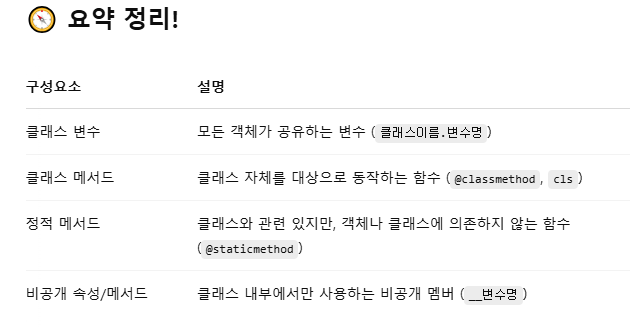

In [40]:
class Person:
    name = '홍길동' # 클래스 변수
    gender = '남자'
print(Person.name, Person.gender)

홍길동 남자


In [41]:
p1 = Person()

In [43]:
p2 = Person()

In [44]:
print(Person.name, Person.gender)   # 클래스의 데이터를 p1과 p2가 참조하며 양쪽에 클래스 데이터가 부여됨
print(p1.name, p1.gender)
print(p2.name, p2.gender)

홍길동 남자
홍길동 남자
홍길동 남자


In [46]:
p2.name = '이순신'                   # p2 객체의 name 변수를 변경. 해당 객체에만 변경 적용됨 
print(Person.name, Person.gender)   
print(p1.name, p1.gender)
print(p2.name, p2.gender)

홍길동 남자
홍길동 남자
이순신 남자


In [47]:
Person.name = '리사'                # Person 클래스의 클래스 변수인 name, gender를 변경
Person.gender = '여자'              # Person 클래스를 통한 객체들의 속성들이 같이 변경됨
print(Person.name, Person.gender)   
print(p1.name, p1.gender)
print(p2.name, p2.gender)          # 단, 사전에 객체에 적용한 변경은 유지됨

리사 여자
리사 여자
이순신 여자


### 메소드 비교
**※인스턴스 메소드(self) vs 클래스 메소드(clz) vs static 메소드()**
- 인스턴스 메소드(self) : 첫번째 인자에 self를 꼭 명시. 객체를 통해서만 호출할 수 있는 메소드
- 클래스 메소드(clz) : 메소드 위에 @classmethod를 선언한 메소드. 첫번째 인자에 cls(clz) 꼭 명시
- static 메소드() : 메소드 위에 @staticmethod를 선언한 메소드. 인자를 넣지 않음

In [50]:
class Person:
    name = '홍길동' # 클래스 변수
    gender = '남자'

    def print_info(self):   # 객체변수명.print_info()로 호출
        print('인스턴스(일반)메소드 - {}는 {}입니다'.format(self.name, self.gender))
    
    def change_info(self, name, gender='남자'):  # 객체변수명.change_info('김', '여자')
        self.name = name
        self.gender = gender
        print('인스턴스(일반)메소드 - {}/{}로 변경합니다.'.format(self.name, self.gender))
        
    @classmethod
    def do_(clz):  # clz==Person  클래스 변수를 이용한 로직이 있을때 주로 사용. Person.do_() / 객체명.do_()
        clz.name = '신사임당'
        clz.gender = '여자'
        print('클래스 메소드 - {}/{}로 변경합니다.'.format(clz.name, clz.gender))
        
    @staticmethod   # 클래스 변수를 이용하기보다는 로직이 우선일 경우. Person.that_() / 객체명.that_()
    def that_():  
        Person.name = '신길동'
        Person.gender = '남자'
        print('static 메소드 - {}/{}로 변경합니다.'.format(Person.name, Person.gender))


In [51]:
p1 = Person()
p1.print_info()

인스턴스(일반)메소드 - 홍길동는 남자입니다


In [52]:
Person.do_()

클래스 메소드 - 신사임당/여자로 변경합니다.


In [55]:
p1.print_info()

인스턴스(일반)메소드 - 신사임당는 여자입니다


In [56]:
Person.that_()

static 메소드 - 신길동/남자로 변경합니다.


In [57]:
p1.print_info()

인스턴스(일반)메소드 - 신길동는 남자입니다


## 요약
**객체를 이용하면 객체에 정보를 저장하고, 그 정보를 이용해서 어떤 기능을 수행하게 한다**
**객체 = 데이터(변수:객체마다 고유의 값) + 기능(메소드/함수)**

**그 객체를 만들기 위한 틀을 클래스**
```
    class 클래스명:
        '독스트링'
        클래스변수명 = 값
        def __init__(self, [객체멤버를 초기화할 변수=값], ...):
            self.인스턴스(일반)변수 = 값
            객체를 생성할 때 객체 멤버 변수의 초기 설정
        
       def method(self):
           인스턴스 메소드(일반함수)의 매개변수는 self를 반드시 포함
       @classmethod(cls):
           코드
       @staticmethod
       def staticmethod():
           코드
    객체변수 = 클래스명()
    객체변수.method()
    클래스명.classmethod()
    클래스명.staticmethod()    
```


In [11]:
class Person:
    def __init__(self, name):
        self.name = name
    def __str__(self):
        return f'{self.name}입니다.'
    def print_info(self):
        #print(f'{self.name}입니다.'')
        print(self)    # 이렇게 하면 print(self.__str__)과 같다

p = Person('홍길동')
p.print_info()
print(p)
p.nickname = '홍별명'      # 파이썬은 기존 객체에 없던 nickname 과 같이 동적으로 인스턴스 멤버 추가가 가능하다. 별로 좋은 방법은 아니다.
p1 = Person('홍길숙')
isinstance(p, Person), isinstance(p1, Person)

홍길동입니다.
홍길동입니다.


(True, True)

In [12]:
isinstance(p, Object)

NameError: name 'Object' is not defined

# 4절. 상속과 재정의
- 기존 클래스와 유사하지만 변형이 필요할 때, 부모 클래스의 모든 속성을 자식클래스로 상속받을 수 있다. 
- 전체를 상속받으나 다시 세팅이 가능하다. 이걸 오버라이딩이라고 한다. (like __str__)
- 문법 : class 자식클래스명(부모클래스명):

In [10]:
class Cal:
    def __init__(self, num1=1, num2=2):
        print('두 수 초기화')
        self.num1 = num1
        self.num2 = num2
    def add(self):
        return self.num1+self.num2
    def sub(self):
        return self.num1-self.num2
    def div(self):        
        return self.num1/self.num2 if self.num2!=0 else '0으로 나눌수 없어요'
    def __str__(self):
        return 'num1={}, num2={}'.format(self.num1, self.num2)
    
class Cal_inherit(Cal):
    def mul(self):
        return self.num1*self.num2

obj1 = Cal_inherit(2,2)
print(obj1.add())
print(obj1.mul())
obj2 = Cal(2,2)
print(obj2.add())
print(type(Cal), type(Cal_inherit))
print(type(obj1), type(obj2))
isinstance(obj1, Cal_inherit), isinstance(obj1, Cal)   
# 위와 같이 상속을 받은 자식클래스는 부모클래스의 타입이기도 하다
# Cal_inherit is a Cal (상속은 is a 관계)

두 수 초기화
4
4
두 수 초기화
4
<class 'type'> <class 'type'>
<class '__main__.Cal_inherit'> <class '__main__.Cal'>


(True, True)

In [13]:
class Person:
    'Person은 이름과 성별을 멤버 변수로 갖고, 출력가능'
    def __init__(self, name, gender):
        print('이름과 성별 초기화')
        self.name = name
        self.gender = gender
    def __str__(self):
        return '{}님은 {}'.format(self.name, self.gender)
    def print_info(self):
        print(self)
        
p = Person('홍길동', '남자')
p.print_info()           # 객체의 함수를 불러올때 self를 불러오지는 않는데
Person.print_info(p)     # 클래스.함수(객체) 이렇게 쓸수도 있다. 물론 이렇게 쓰지는 않는다

이름과 성별 초기화
홍길동님은 남자


In [14]:
# s = Student('홍길숙', '여자', 'AI')
# 위의 걸 적용하려면 기존의 인스턴스 함수 __init__(), __str__() 을 수정해야 한다.
# 상속 받아서 인스턴스 함수를 바꾸는 방법을 보자

# override : 상속 받은 클래스의 함수를 자식클래스에서 재정의
            # 부모클래스의 함수명과 매개변수 개수가 동일
# cf) overload : 함숭의 중복정의(같은이름의 함수를 매개변수 갯수를 달리해서 재정의 - 불가)

class Student(Person):
    def __init__(self, name, gender, major):    #이건 override가 아니라 덮어 씌우는 것
        super().__init__(name, gender)   # super() : '부모클래스의' 라는 뜻, 즉 부모클래스 __init__의 name, gender를 적용한다는 의미
      # Person.__init__(self, name, gender)   <- 이렇게도 쓸수 있음
        self.major = major                            
    def __str__(self):   # override
        return super().__str__() + "이고, 전공은 {}".format(self.major)

In [15]:
s = Student('홍길숙', '여자', 'AI')

이름과 성별 초기화


In [17]:
print(s)
s.print_info()

홍길숙님은 여자이고, 전공은 AI
홍길숙님은 여자이고, 전공은 AI


In [18]:
isinstance(s, Student), isinstance(s, Person)

(True, True)

## 정적변수(static 변수)
- 여러 객체들 사이에 데이터를 공유하고 싶을 때 사용
- static 변수 앞에 under score 2개(__)를 붙이면 클래스명._클래스명__static변수명으로 참조
- 클래스 변수는 외부에서 바로 접근 가능
- static 변수는 외부에서 바로 접근하는 것을 방지
- static 변수는 클래스 내부에서만 접근하도록 하려는 의도

In [1]:
class Person:
#    major = 'AI'  # class 변수

    def __init__(self, name, gender):
        self.name = name
        self.gender = gender
    def print_info(self):    # 추상메소드 : 
        raise Exception('이 메소드는 호출하면 예외가 납니다') # 강제 예외 발생,이 클래스를 상속 받아서 override 하라는 일종의 포맷이다.
    def __str__(self):
        return f'{self.name}은 {self.gender}'

class Student(Person):   # Person 클래스를 상속받는다
    __count = 0          # static 변수 - 객체의 갯수나 시리얼 넘버를 입력할때 주로 사용함
    # 클래스명._클래스명__count로 사용, 클래스명.__count는 외부에서 접근 불가
    def __init__(self, name, gender, major):
        super().__init__(name, gender)
        self.major = major
        Student._Student__count += 1 # 객체가 생성될때마다 __count 1증가
    def __del__(self):
        Student._Student__count -= 1 # 객체가 소멸될때마다 __count 1감소
    def print_info(self):
        print('{}는 {}이고, 전공은 {}({}번째)'.format(self.name,
                                           self.gender,
                                           self.major,
                                           Student._Student__count))
    def __str__(self):
        return super().__str__() + '이고, 전공은 {}'.format(self.major)
    @classmethod
    def get_count(cls):
        return cls.__count
#       return Student._Student__count  이와 같이 사용 가능

In [2]:
# p.print_info()
s1 = Student('홍길동', '남자', 'AI')
s1.print_info()

홍길동는 남자이고, 전공은 AI(1번째)


In [3]:
s2 = Student('김길숙', '여자', '통계')
s2.print_info()

김길숙는 여자이고, 전공은 통계(2번째)


In [4]:
Student.get_count()

2

In [5]:
s3 = Student('신길동', '남자', '경영')

In [6]:
Student.get_count()

3

In [7]:
del s2

In [8]:
Student.get_count()

2

In [10]:
s3.print_info()

신길동는 남자이고, 전공은 경영(2번째)


# 5절. 연습문제

## 실습형

In [10]:
# 1. 도형 (Shape) 클래스와 삼각형 (Triangle) 클래스를 만들어야 합니다 

class Shape:
    
    def __init__(self, x=0,y=0):
        self.x = x
        self.y = y
    def move(self, x, y):
        self.x = x
        self.y = y
    def __str__(self):
        return self.x, self.y
    def calc_area(self):
        raise Exception('추상메소드')
    @staticmethod
    def state_():
        return '아마도 본 도형은 삼각형입니다'

class Triangle(Shape):
#    area = "계산 전"
    __count = 0
    def __init__(self, x=0, y=0):
        super().__init__(x, y)
        self.width = self.x
        self.height = self.y
        Triangle._Triangle__count +=1
        
    def __del__(self):
        Triangle._Triangle__count -=1


    def calc_area(self):
        self.area = self.width*self.height*0.5
        return self.area if self.area>0 else 0
    
    def __str__(self):
        return '해당 삼각형의 너비는 {}, 높이는 {}, 면적은 {}입니다.'.format(self.width,
                                                           self.height,
                                                           self.calc_area())

In [21]:
s1 = Shape()
s1.move(2,3)

In [24]:
s1.state_()

'아마도 본 도형은 삼각형입니다'

In [4]:
s3 = Triangle(2,3)

In [5]:
s3.__str__()

'해당 삼각형의 너비는 2, 높이는 3, 면적은 3.0입니다.'

In [8]:
s4 = Triangle()

In [9]:
s4.__str__()

'해당 삼각형의 너비는 0, 높이는 0, 면적은 0입니다.'

## 서술형

In [ ]:
# 1. 1번
# 2. 2번
# 3. 1번  (x)  -> 4번
# 4. 1번
# 5. 2번
# 6. 3번
# 7. 2번  (x)  -> 3번 / 2번은 권장되진 않지만 틀리진 않음. 3번은 인스턴스 함수는 객체에만 있으므로 사용이 안됨
# 8. 2번  (x)  -> 3번 / 틀린걸 골라야했다. 1번 Super.do_(self, a) 와 같이 클래스명.함수명(매개변수)도 권장되진 않지만 틀리지 않다
# 9. 1번  (x)  -> 2번 / __str__() 메소드도 인스턴스 메소드이다. 그리고 self도 매개변수다..

In [16]:
class Person:                   
    accademy = 'MBC'                    
    def __init__(self, name, gender):   
        self.name = name               
        self.gender = gender
        
    def print_info(self):
        print('{}는 {}입니다. {}를 다닙니다'.format(self.name, 
                                               self.gender, 
                                               self.accademy))
    def __str__(self):
        return '{}는 {}입니다. {}를 다닙니다'.format(self.name, 
                                               self.gender, 
                                               self.accademy)
p = Person("홍길동", "남자")
p.print_info()
p.__dict__   # 객체를 딕셔너리 타입으로 전환, 클래스의 멤버 중 변수들을 확인 가능

홍길동는 남자입니다. MBC를 다닙니다


{'name': '홍길동', 'gender': '남자'}